# Example

In [5]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import liion.elmodel
except ImportError:
    import sys
    sys.path.append('..')
    import liion.elmodel
import importlib
importlib.reload(liion.elmodel)
from liion.elmodel import *

In [6]:
class Bat133V(LiIon):
    #
    # Default values, may be overloaded either with a constructor or by direct assignment

    C = 41.0  # Ah

    eta_c_0 = 0.9922
    eta_c_T = 2.08e-4  # deg(C)-1
    eta_c_i = -4.2e-5  # A-1

    K_dif_elec = 1.37e-5  # A-1
    b_dif_elec = 468.2    # deg(C)
    T_0_dif_elec = -74.9  # deg(C)

    A_int = [54.96, -9.33, 15.6, -4.732, -7.13, -8.117, 33.19, -20.19]

    U_0_bat = 108.4  # V

    R_ohm_0 = 73.58e-3     # Ohm
    R_ohm_T = -0.1292e-3   # Ohm K-1
    R_ohm_SOC = -2.849e-3  # Ohm

    E_A = 41.0        # kJ mol-1
    n = 2.0
    A_k_00 = 1.95e-9  # m2 s-1

    K_dif_mem = 0.021    # A-1
    b_dif_mem = 19.7     # deg(C)
    T_0_dif_mem = -13.0  # deg(C)


    def __init__(self, **kwargs):
        super().__init__(**kwargs)


i_const [A] = 20.5


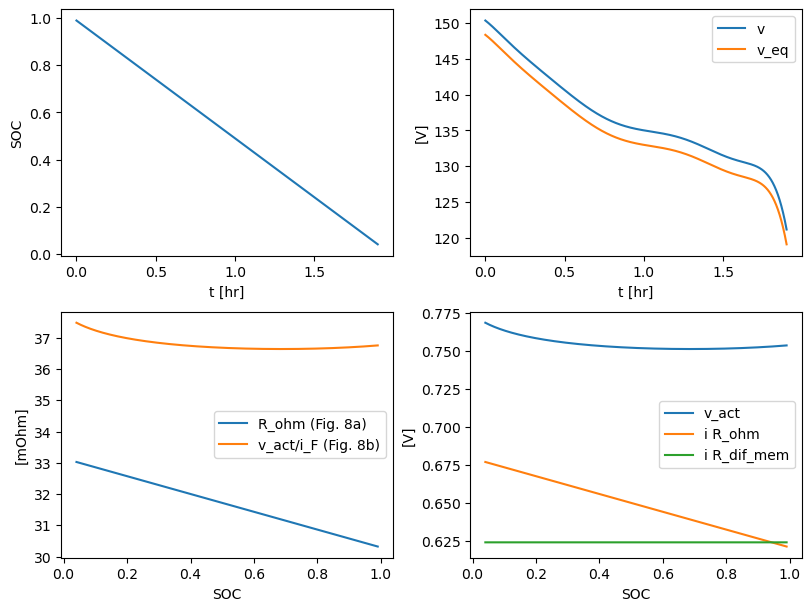

In [7]:
#
# Complete discharging at i=0.5C
#

bat = Bat133V()

hr = 3600.0
t_max = 1.9*hr
t = np.linspace(0.0, t_max, int(t_max+1))

i_const = 0.5*bat.C
i = i_const * np.ones_like(t)  # Half of a current which would discharge a battery in hour
print("i_const [A] =", i_const)

T = 40.0  # [deg(C)]

v, SOC = bat.i_to_v(t, i, T, 0.99)


plt.figure(figsize=(8, 6), layout='constrained')

plt.subplot(2, 2, 1)
plt.plot(t/hr, SOC)
plt.xlabel("t [hr]")
plt.ylabel("SOC")

plt.subplot(2, 2, 2)
plt.plot(t/hr, v, label="v")
plt.plot(t/hr, bat.v_eq, label="v_eq")
plt.legend()
plt.xlabel("t [hr]")
plt.ylabel("[V]")

plt.subplot(2, 2, 3)
plt.plot(SOC, 1e3*bat.R_ohm, label="R_ohm (Fig. 8a)")
plt.plot(SOC, 1e3*bat.v_act/bat.i_F, label="v_act/i_F (Fig. 8b)")
plt.legend()
plt.xlabel("SOC")
plt.ylabel("[mOhm]")

plt.subplot(2, 2, 4)
plt.plot(SOC, bat.v_act, label="v_act")
plt.plot(SOC, i*bat.R_ohm, label="i*R_ohm")
plt.plot(SOC, i*bat.R_dif_mem, label="i*R_dif_mem")
plt.legend()
plt.xlabel("SOC")
plt.ylabel("[V]")

plt.show()
plt.close()

/home/kurbatov/Sync/Sci/Анализ данных/LiPo/liion.git/examples/../liion/elmodel.py:195: RuntimeWarning: invalid value encountered in log
  def _v_eq(T, x_a, x_c, v_int, U_0_bat):
/home/kurbatov/Sync/Sci/Анализ данных/LiPo/liion.git/examples/../liion/elmodel.py:208: RuntimeWarning: invalid value encountered in sqrt
  def _v_act(i, T, x_a, x_c, E_A, n, A_k_00):
/home/kurbatov/Sync/Sci/Анализ данных/LiPo/liion.git/examples/../liion/elmodel.py:217: RuntimeWarning: invalid value encountered in sqrt
  def _i_F(T, x_a, x_c, v_act, E_A, n, A_k_00):
/home/kurbatov/Sync/Sci/Анализ данных/LiPo/liion.git/examples/../liion/elmodel.py:227: RuntimeWarning: invalid value encountered in sqrt
  # WRONG!


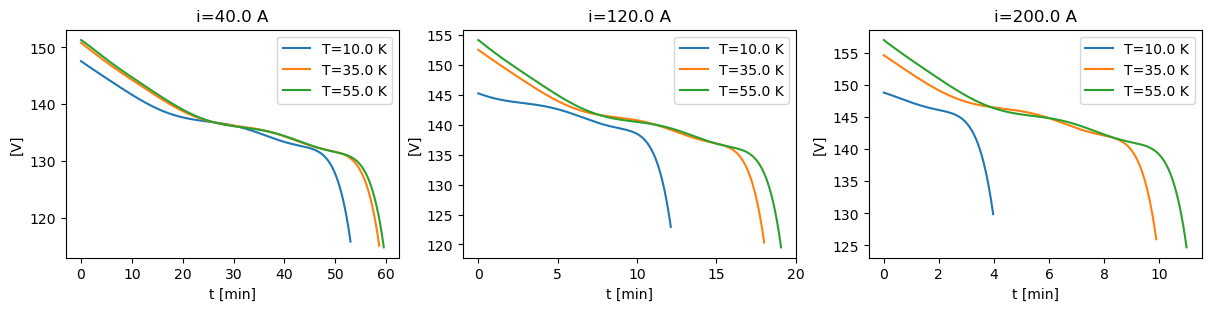

In [8]:
#
# Discharge at different currents and temperatures
# See Sec. 6.1 of the Paper
#

ii = [40.0, 120.0, 200.0]
TT = [10.0, 35.0, 55.0]

hr = 3600.0
t_max = 1.0*hr
t = np.linspace(0.0, t_max, int(t_max+1))

plt.figure(figsize=(12, 3), layout='constrained')

for k, i_const in enumerate(ii):
    i = i_const * np.ones_like(t)

    plt.subplot(1, 3, k+1)
    plt.title(f"i={i_const} A")
    for T in TT:
        bat = Bat133V()
        v, SOC = bat.i_to_v(t, i, T, 0.99)
        mask = SOC > 0.0
        plt.plot(t[mask]/60, v[mask], label=f"T={T} K")
    plt.legend()
    plt.xlabel("t [min]")
    plt.ylabel("[V]")

plt.show()
plt.close()